# Modeling 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./data/final_alex_eda_dataframe.csv')

In [6]:
import statsmodels.api as sm

**We are interested to see if states that are mask positive have a significant impact on percent change in cases. R2 of .05 is low and the p-val of .13 is insignificant.**

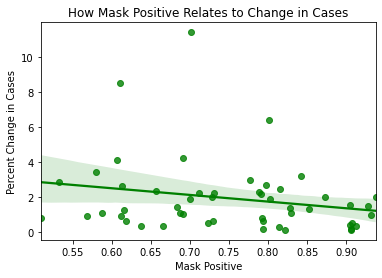

In [13]:
sns.regplot(data = df, x='mask_positive', y='percent change cases', color='green')
plt.xlabel('Mask Positive')
plt.ylabel('Percent Change in Cases')
plt.title('How Mask Positive Relates to Change in Cases')
plt.savefig('./assets/images/pos_mask_cases.png');

In [7]:
X = df['mask_positive']
y = df['percent change cases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     percent change cases   R-squared:                       0.046
Model:                              OLS   Adj. R-squared:                  0.027
Method:                   Least Squares   F-statistic:                     2.372
Date:                  Thu, 29 Oct 2020   Prob (F-statistic):              0.130
Time:                          20:07:30   Log-Likelihood:                -108.02
No. Observations:                    51   AIC:                             220.0
Df Residuals:                        49   BIC:                             223.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.7807      1.881      2.541      0.014       1.000       8.562
mask_positive    -3.8184      2.480     -1.540      0.130      -8.801       1.164
==============================================================================
Omnibus:                       49.160   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.309
Skew:                           2.611   Prob(JB):                     9.63e-46
Kurtosis:                      11.384   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We are interested to see if states that are mask negative have a significant impact on percent change in cases. R2 of .03 is low and the p-val of .224 is insignificant.**

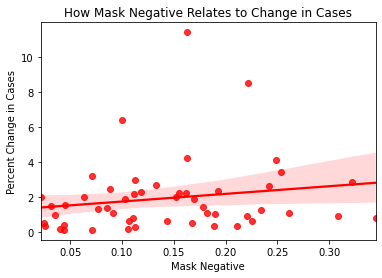

In [23]:
sns.regplot(data = df, x='mask_negative', y='percent change cases', color='red')
plt.xlabel('Mask Negative')
plt.ylabel('Percent Change in Cases')
plt.title('How Mask Negative Relates to Change in Cases');
plt.savefig('./assets/images/neg_mask_cases.png')

In [16]:
X = df['mask_negative']
y = df['percent change cases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     percent change cases   R-squared:                       0.030
Model:                              OLS   Adj. R-squared:                  0.010
Method:                   Least Squares   F-statistic:                     1.517
Date:                  Thu, 29 Oct 2020   Prob (F-statistic):              0.224
Time:                          21:02:22   Log-Likelihood:                -108.45
No. Observations:                    51   AIC:                             220.9
Df Residuals:                        49   BIC:                             224.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2920      0.585      2.210      0.032       0.117       2.467
mask_negative     4.3813      3.557      1.232      0.224      -2.766      11.529
==============================================================================
Omnibus:                       50.139   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.482
Skew:                           2.668   Prob(JB):                     9.80e-48
Kurtosis:                      11.568   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We were also interested to see if population and percent change in cases interacted. Not much**

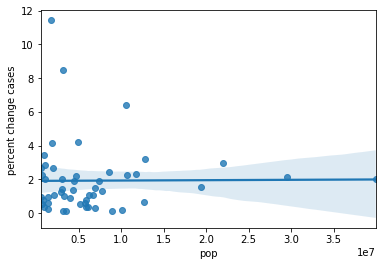

In [20]:
sns.regplot(data = df, x='pop', y='percent change cases');

**We wanted to see how the percent of party vote in the 2016 presidential election interacted with percent mask_negative and mask_positive. Percent Republican Vote by state seems to have a positive linear correlation with percent mask negative by state. An OLS regression finds an R2 of .534 and a p-val of 0.000.**

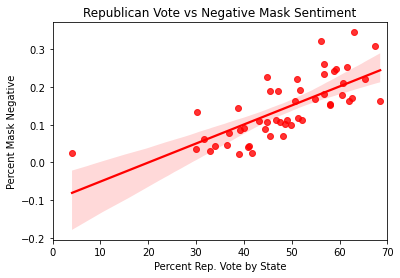

In [24]:
sns.regplot(data=df, x='percr', y='mask_negative', color='red')
plt.ylabel('Percent Mask Negative')
plt.xlabel('Percent Rep. Vote by State')
plt.xlim(0, 70)
plt.title('Republican Vote vs Negative Mask Sentiment')
#plt.legend();
plt.savefig('./assets/images/republican_mask')

In [145]:
X = df['percr']
y = df['mask_negative']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mask_negative   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     56.26
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           1.12e-09
Time:                        18:15:12   Log-Likelihood:                 75.003
No. Observations:                  51   AIC:                            -146.0
Df Residuals:                      49   BIC:                            -142.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1011      0.033     -3.022      0.004      -0.168      -0.034
percr          0.0050      0.001      7.501      0.000       0.004       0.006
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.440
Skew:                           0.699   Prob(JB):                        0.109
Kurtosis:                       2.634   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Percent Democratic Vote by state seems to have a positive linear correlation with percent mask positive by state. An OLS regression finds an R2 of .619 and a p-val of 0.000.**

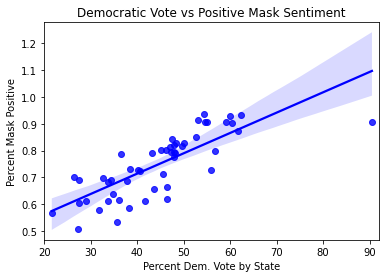

In [25]:
sns.regplot(data=df, x='percd', y='mask_positive', color='blue')
plt.ylabel('Percent Mask Positive')
plt.xlabel('Percent Dem. Vote by State')
plt.xlim(20, 92)
plt.title('Democratic Vote vs Positive Mask Sentiment')
#plt.legend();
plt.savefig('./assets/images/democrat_mask.png')

In [26]:
X = df['percd']
y = df['mask_positive']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          mask_positive   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     79.76
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           7.47e-12
Time:                        21:13:03   Log-Likelihood:                 62.171
No. Observations:                  51   AIC:                            -120.3
Df Residuals:                      49   BIC:                            -116.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.039     10.461      0.0